#Question 1 - Merge Two Sorted Lists

You are given the heads of two sorted linked lists list1 and list2.

Merge the two lists into one sorted list. The list should be made by splicing together the nodes of the first two lists.

Return the head of the merged linked list.

\
**Example 1:**

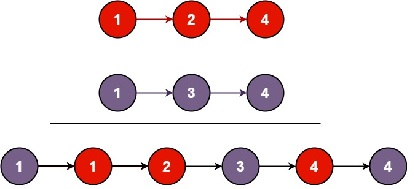

Input: list1 = [1,2,4], list2 = [1,3,4]

Output: [1,1,2,3,4,4]

\
**Example 2:**

Input: list1 = [], list2 = []

Output: []

\
**Example 3:**

Input: list1 = [], list2 = [0]

Output: [0]

\
**Constraints:**

The number of nodes in both lists is in the range [0, 50].

-100 <= Node.val <= 100

Both list1 and list2 are sorted in non-decreasing order.

In [ ]:
class ListNode(object):
    def __init__(self, val=0, next=None):
        self.val = val
        self.next = next

class Solution(object):
    def mergeTwoLists(self, list1, list2):
        dummy = ListNode(-1)
        current = dummy

        while list1 and list2:
            if list1.val < list2.val:
                current.next = list1
                list1 = list1.next
            else:
                current.next = list2
                list2 = list2.next
            current = current.next

        current.next = list1 if list1 else list2
        return dummy.next

# Function to create a linked list from a list
def create_linked_list(arr):
    if not arr:
        return None
    head = ListNode(arr[0])
    current = head
    for val in arr[1:]:
        current.next = ListNode(val)
        current = current.next
    return head

# Function to print a linked list
def print_linked_list(head):
    result = []
    while head:
        result.append(head.val)
        head = head.next
    print(result)

# Taking user input for two sorted linked lists
list1 = list(map(int, input("Enter elements of first sorted list (space-separated): ").split()))
list2 = list(map(int, input("Enter elements of second sorted list (space-separated): ").split()))

# Creating linked lists
l1 = create_linked_list(list1)
l2 = create_linked_list(list2)

# Merging and printing the result
solution = Solution()
merged_list = solution.mergeTwoLists(l1, l2)
print("Merged sorted linked list:")
print_linked_list(merged_list)

#Question 2 - Palindrome Linked List

Given the head of a singly linked list, return true if it is a palindrome or false otherwise.


\
**Example 1:**

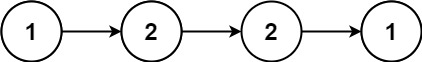

Input: head = [1,2,2,1]

Output: true

\
**Example 2:**

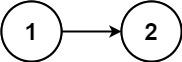

Input: head = [1,2]

Output: false

\
**Constraints:**

The number of nodes in the list is in the range [1, 105].

0 <= Node.val <= 9

In [ ]:
class ListNode(object):
    def __init__(self, val=0, next=None):
        self.val = val
        self.next = next

class Solution(object):
    def isPalindrome(self, head):
        """
        :type head: Optional[ListNode]
        :rtype: bool
        """
        if not head or not head.next:
            return True  # Single node or empty list is always a palindrome

        # Step 1: Find the middle of the linked list
        slow, fast = head, head
        while fast and fast.next:
            slow = slow.next
            fast = fast.next.next

        # Step 2: Reverse the second half
        prev, curr = None, slow
        while curr:
            temp = curr.next
            curr.next = prev
            prev = curr
            curr = temp

        # Step 3: Compare first and second halves
        left, right = head, prev
        while right:  # Only check till the reversed half
            if left.val != right.val:
                return False
            left, right = left.next, right.next

        return True  # Palindrome if all values match

# Helper function to create a linked list from a list
def create_linked_list(arr):
    if not arr:
        return None
    head = ListNode(arr[0])
    current = head
    for val in arr[1:]:
        current.next = ListNode(val)
        current = current.next
    return head

# Taking user input
nums = list(map(int, input("Enter space-separated numbers for linked list: ").split()))

# Creating linked list
head = create_linked_list(nums)

# Checking if the linked list is a palindrome
solution = Solution()
print("Palindrome:", solution.isPalindrome(head))

Enter space-separated numbers for linked list: 1 2 2 1
Palindrome: True


#Question 3 - Merge k Sorted Lists

You are given an array of k linked-lists lists, each linked-list is sorted in ascending order.

Merge all the linked-lists into one sorted linked-list and return it.


\
Example 1:

Input: lists = [[1,4,5],[1,3,4],[2,6]]

Output: [1,1,2,3,4,4,5,6]

Explanation:

The linked-lists are:

[

  1->4->5,

  1->3->4,

  2->6

]

merging them into one sorted list:

1->1->2->3->4->4->5->6

\
Example 2:

Input: lists = []

Output: []

\
Example 3:

Input: lists = [[]]

Output: []

\
**Constraints:**

k == lists.length

0 <= k <= 104

0 <= lists[i].length <= 500

-104 <= lists[i][j] <= 104

lists[i] is sorted in ascending order.

The sum of lists[i].length will not exceed 104.

In [ ]:
import heapq

class ListNode(object):
    def __init__(self, val=0, next=None):
        self.val = val
        self.next = next

class Solution(object):
    def mergeKLists(self, lists):
        """
        :type lists: List[Optional[ListNode]]
        :rtype: Optional[ListNode]
        """
        if not lists or len(lists) == 0:
            return None  # If there are no lists, return None

        # Min-heap to store (value, index, node)
        min_heap = []
        for i, node in enumerate(lists):
            if node:  # Only push non-empty lists
                heapq.heappush(min_heap, (node.val, i, node))

        # Dummy head to simplify linked list construction
        dummy = ListNode(0)
        current = dummy

        while min_heap:
            val, i, node = heapq.heappop(min_heap)  # Get smallest node
            current.next = node  # Link it to the merged list
            current = current.next

            if node.next:  # Push next node from the same list
                heapq.heappush(min_heap, (node.next.val, i, node.next))

        return dummy.next

# Helper function to create a linked list from a list
def create_linked_list(arr):
    if not arr:
        return None
    head = ListNode(arr[0])
    current = head
    for val in arr[1:]:
        current.next = ListNode(val)
        current = current.next
    return head

# Helper function to print a linked list
def print_linked_list(head):
    result = []
    while head:
        result.append(str(head.val))
        head = head.next
    print("->".join(result))

# Taking user input
k = int(input("Enter number of linked lists: "))
lists = []
for i in range(k):
    nums = list(map(int, input(f"Enter space-separated numbers for list {i+1}: ").split()))
    lists.append(create_linked_list(nums))

# Merging k sorted linked lists
solution = Solution()
merged_head = solution.mergeKLists(lists)

# Printing the merged linked list
print("Merged Linked List:")
print_linked_list(merged_head)

#Question 4 - Reverse Nodes in k-Group

Given the head of a linked list, reverse the nodes of the list k at a time, and return the modified list.

k is a positive integer and is less than or equal to the length of the linked list. If the number of nodes is not a multiple of k then left-out nodes, in the end, should remain as it is.

You may not alter the values in the list's nodes, only nodes themselves may be changed.


\
**Example 1:**

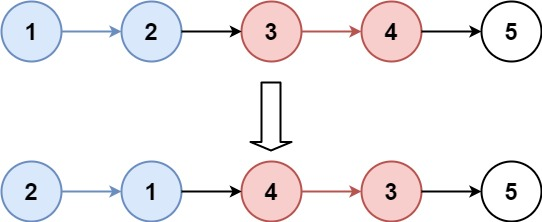

Input: head = [1,2,3,4,5], k = 2

Output: [2,1,4,3,5]

\
**Example 2:**

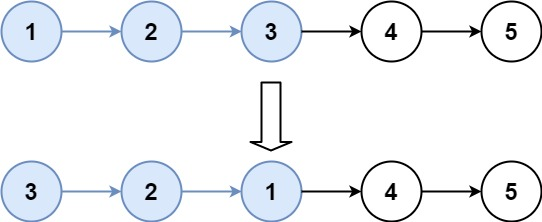

Input: head = [1,2,3,4,5], k = 3

Output: [3,2,1,4,5]

\
**Constraints:**

The number of nodes in the list is n.

1 <= k <= n <= 5000

0 <= Node.val <= 1000

In [ ]:
class ListNode(object):
    def __init__(self, val=0, next=None):
        self.val = val
        self.next = next

class Solution(object):
    def reverseKGroup(self, head, k):
        """
        :type head: Optional[ListNode]
        :type k: int
        :rtype: Optional[ListNode]
        """
        if not head or k == 1:
            return head  # No change needed if k == 1

        # Dummy node to simplify operations
        dummy = ListNode(0)
        dummy.next = head
        prev_group = dummy
        current = head

        # Count total nodes in the linked list
        count = 0
        while current:
            count += 1
            current = current.next

        # Reverse k-group nodes
        current = head
        while count >= k:
            prev = None
            tail = current  # The tail will be the first node after reversal
            for _ in range(k):
                next_node = current.next
                current.next = prev
                prev = current
                current = next_node

            # Connect previous group with newly reversed part
            prev_group.next = prev
            tail.next = current
            prev_group = tail  # Move to the next group

            count -= k  # Reduce count by k

        return dummy.next

# Helper function to create a linked list from a list
def create_linked_list(arr):
    if not arr:
        return None
    head = ListNode(arr[0])
    current = head
    for val in arr[1:]:
        current.next = ListNode(val)
        current = current.next
    return head

# Helper function to print a linked list
def print_linked_list(head):
    result = []
    while head:
        result.append(str(head.val))
        head = head.next
    print("->".join(result))

# Taking user input
nums = list(map(int, input("Enter space-separated numbers: ").split()))
k = int(input("Enter k: "))

# Creating linked list and processing
head = create_linked_list(nums)
solution = Solution()
reversed_head = solution.reverseKGroup(head, k)

# Printing the modified linked list
print("Reversed Linked List:")
print_linked_list(reversed_head)

# Question 5 - Reorder List

You are given the head of a singly linked-list. The list can be represented as:

`L0 → L1 → … → Ln - 1 → Ln`

Reorder the list to be on the following form:

`L0 → Ln → L1 → Ln - 1 → L2 → Ln - 2 → …`

You may not modify the values in the list's nodes. Only nodes themselves may be changed.


\
**Example 1:**

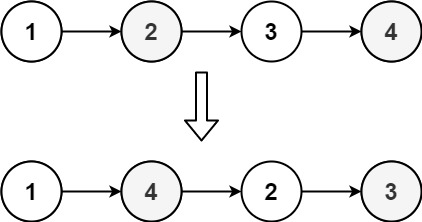

Input: head = [1,2,3,4]

Output: [1,4,2,3]

\
**Example 2:**

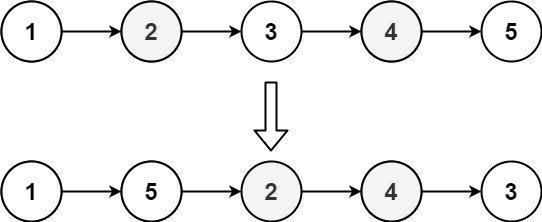

Input: head = [1,2,3,4,5]

Output: [1,5,2,4,3]

\
**Constraints:**

The number of nodes in the list is in the range [1, 5 * 104].

1 <= Node.val <= 1000

In [ ]:
class ListNode(object):
    def __init__(self, val=0, next=None):
        self.val = val
        self.next = next

class Solution(object):
    def reorderList(self, head):
        if not head or not head.next:
            return

        # Step 1: Find middle using slow & fast pointers
        slow, fast = head, head
        while fast and fast.next:
            slow = slow.next
            fast = fast.next.next

        # Step 2: Reverse second half
        prev, curr = None, slow.next
        slow.next = None  # Cut the first half
        while curr:
            next_temp = curr.next
            curr.next = prev
            prev = curr
            curr = next_temp

        # Step 3: Merge two halves
        first, second = head, prev
        while second:
            temp1, temp2 = first.next, second.next
            first.next = second
            second.next = temp1
            first, second = temp1, temp2

# Helper function to print linked list
def printList(head):
    result = []
    while head:
        result.append(head.val)
        head = head.next
    print(result)

# Create linked list from user input
def createLinkedList():
    arr = list(map(int, input("Enter space-separated numbers: ").split()))
    if not arr:
        return None
    head = ListNode(arr[0])
    current = head
    for val in arr[1:]:
        current.next = ListNode(val)
        current = current.next
    return head

# Example Usage:
head = createLinkedList()
solution = Solution()
solution.reorderList(head)
print("Reordered List:")
printList(head)

# Question 6 - Longest Substring Without Repeating Characters

Given a string s, find the length of the longest substring without duplicate characters.


\
**Example 1:**

Input: s = "abcabcbb"

Output: 3

Explanation: The answer is "abc", with the length of 3.

\
**Example 2:**

Input: s = "bbbbb"

Output: 1

Explanation: The answer is "b", with the length of 1.

\
**Example 3:**

Input: s = "pwwkew"

Output: 3

Explanation: The answer is "wke", with the length of 3.

Notice that the answer must be a substring, "pwke" is a subsequence and not a substring.

\
**Constraints:**

0 <= s.length <= 5 * 104

s consists of English letters, digits, symbols and spaces.

In [ ]:
class Solution(object):
    def lengthOfLongestSubstring(self, s):
        """
        :type s: str
        :rtype: int
        """
        char_set = set()
        left = 0
        max_length = 0

        for right in range(len(s)):
            while s[right] in char_set:
                char_set.remove(s[left])
                left += 1
            char_set.add(s[right])
            max_length = max(max_length, right - left + 1)

        return max_length

# Taking user input
s = input("Enter a string: ")
solution = Solution()
print("Length of the longest substring without repeating characters:", solution.lengthOfLongestSubstring(s))

# Question 7 - Shortest Palindrome

You are given a string s. You can convert s to a palindrome by adding characters in front of it.

Return the shortest palindrome you can find by performing this transformation.


\
**Example 1:**

Input: s = "aacecaaa"
Output: "aaacecaaa"

\
**Example 2:**

Input: s = "abcd"
Output: "dcbabcd"

\
**Constraints:**

0 <= s.length <= 5 * 104

s consists of lowercase English letters only.

In [ ]:
class Solution(object):
    def shortestPalindrome(self, s):
        """
        :type s: str
        :rtype: str
        """
        if not s:
            return s

        rev_s = s[::-1]  # Reverse the string
        new_s = s + "#" + rev_s  # Use '#' as a separator to avoid overlap

        # Compute the LPS (Longest Prefix Suffix) array using KMP algorithm
        lps = [0] * len(new_s)
        j = 0  # Length of the longest prefix that is also a suffix
        for i in range(1, len(new_s)):
            while j > 0 and new_s[i] != new_s[j]:
                j = lps[j - 1]
            if new_s[i] == new_s[j]:
                j += 1
            lps[i] = j

        # Add the missing characters at the front
        return rev_s[:len(s) - lps[-1]] + s

# Taking user input
s = input("Enter a string: ").strip()
solution = Solution()
print(solution.shortestPalindrome(s))


#Question 8 - Longest Palindromic Substring

Given a string s, return the longest palindromic substring in s.


\
**Example 1:**

Input: s = "babad"

Output: "bab"

Explanation: "aba" is also a valid answer.

\
**Example 2:**

Input: s = "cbbd"

Output: "bb"

\
**Constraints:**

1 <= s.length <= 1000

s consist of only digits and English letters.

In [ ]:
class Solution(object):
    def longestPalindrome(self, s):
        """
        :type s: str
        :rtype: str
        """
        if not s or len(s) == 1:
            return s

        def expand_around_center(left, right):
            while left >= 0 and right < len(s) and s[left] == s[right]:
                left -= 1
                right += 1
            return s[left + 1:right]  # Extract the valid palindrome

        longest = ""
        for i in range(len(s)):
            # Odd-length palindrome
            odd_palindrome = expand_around_center(i, i)
            # Even-length palindrome
            even_palindrome = expand_around_center(i, i + 1)

            # Update longest palindrome
            if len(odd_palindrome) > len(longest):
                longest = odd_palindrome
            if len(even_palindrome) > len(longest):
                longest = even_palindrome

        return longest

# Taking user input
s = input("Enter a string: ").strip()
solution = Solution()
print(solution.longestPalindrome(s))


#Question 9 - Longest Happy Prefix

A string is called a happy prefix if is a non-empty prefix which is also a suffix (excluding itself).

Given a string s, return the longest happy prefix of s. Return an empty string "" if no such prefix exists.


\
**Example 1:**

Input: s = "level"

Output: "l"

Explanation: s contains 4 prefix excluding itself ("l", "le", "lev", "leve"), and suffix ("l", "el", "vel", "evel"). The largest prefix which is also suffix is given by "l".

\
**Example 2:**

Input: s = "ababab"

Output: "abab"

Explanation: "abab" is the largest prefix which is also suffix. They can overlap in the original string.

\
**Constraints:**

1 <= s.length <= 105

s contains only lowercase English letters.

In [ ]:
class Solution(object):
    def longestPrefix(self, s):
        """
        :type s: str
        :rtype: str
        """
        n = len(s)
        lps = [0] * n  # Longest Prefix Suffix array

        j = 0  # Length of the previous longest prefix suffix
        for i in range(1, n):
            while j > 0 and s[i] != s[j]:
                j = lps[j - 1]  # Move back in the LPS array

            if s[i] == s[j]:
                j += 1
                lps[i] = j

        return s[:lps[-1]]  # The longest happy prefix

# Taking user input
s = input("Enter a string: ").strip()
solution = Solution()
print(solution.longestPrefix(s))

#Question 10 - Rotate List

Given the head of a linked list, rotate the list to the right by k places.

\
**Example 1:**

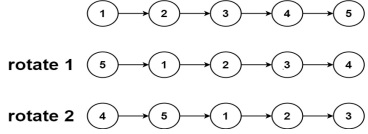

Input: head = [1,2,3,4,5], k = 2

Output: [4,5,1,2,3]

\
**Example 2:**

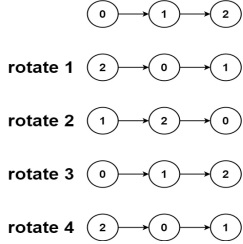

Input: head = [0,1,2], k = 4

Output: [2,0,1]

\
**Constraints:**

The number of nodes in the list is in the range [0, 500].

-100 <= Node.val <= 100

0 <= k <= 2 * 109

In [ ]:
# Definition for singly-linked list.
class ListNode(object):
    def __init__(self, val=0, next=None):
        self.val = val
        self.next = next

class Solution(object):
    def rotateRight(self, head, k):
        """
        :type head: Optional[ListNode]
        :type k: int
        :rtype: Optional[ListNode]
        """
        if not head or not head.next or k == 0:
            return head

        # Step 1: Count the length of the linked list
        length = 1
        tail = head
        while tail.next:
            tail = tail.next
            length += 1

        # Step 2: Compute the effective rotation
        k = k % length  # If k is greater than length, adjust it
        if k == 0:
            return head  # No rotation needed

        # Step 3: Find the new tail (length - k - 1) and new head (length - k)
        new_tail = head
        for _ in range(length - k - 1):
            new_tail = new_tail.next

        new_head = new_tail.next
        new_tail.next = None  # Break the list

        # Step 4: Connect the old tail to the old head
        tail.next = head

        return new_head

# Function to convert list to linked list
def list_to_linkedlist(lst):
    if not lst:
        return None
    head = ListNode(lst[0])
    current = head
    for val in lst[1:]:
        current.next = ListNode(val)
        current = current.next
    return head

# Function to print linked list
def print_linkedlist(head):
    values = []
    while head:
        values.append(str(head.val))
        head = head.next
    print(" -> ".join(values))

# User input
lst = list(map(int, input("Enter space-separated linked list elements: ").split()))
k = int(input("Enter the value of k: "))

# Convert list to linked list
head = list_to_linkedlist(lst)

# Rotate linked list
solution = Solution()
new_head = solution.rotateRight(head, k)

# Print result
print("Rotated Linked List:")
print_linkedlist(new_head)

#Question 11 - Longest Valid Parentheses

Given a string containing just the characters '(' and ')', return the length of the longest valid (well-formed) parentheses substring.


\
**Example 1:**

Input: s = "(()"

Output: 2

Explanation: The longest valid parentheses substring is "()".

\
**Example 2:**

Input: s = ")()())"

Output: 4

Explanation: The longest valid parentheses substring is "()()".

\
**Example 3:**

Input: s = ""

Output: 0

\
**Constraints:**

0 <= s.length <= 3 * 104

s[i] is '(', or ')'.

In [ ]:
def longestValidParentheses(s):
    stack = [-1]  # Initialize stack with -1 to handle edge cases
    max_length = 0

    for i, char in enumerate(s):
        if char == '(':
            stack.append(i)  # Push index of '(' onto the stack
        else:
            stack.pop()  # Pop the last '(' or base index
            if not stack:
                stack.append(i)  # Update base index if stack is empty
            else:
                max_length = max(max_length, i - stack[-1])  # Compute valid length

    return max_length

# User input
s = input("Enter the string containing only '(' and ')': ")

# Compute and print result
result = longestValidParentheses(s)
print("Length of the longest valid parentheses substring:", result)

#Question 12 - Evaluate Reverse Polish Notation

You are given an array of strings tokens that represents an arithmetic expression in a Reverse Polish Notation.

Evaluate the expression. Return an integer that represents the value of the expression.

\
**Note that:**

The valid operators are '+', '-', '*', and '/'.

Each operand may be an integer or another expression.

The division between two integers always truncates toward zero.

There will not be any division by zero.

The input represents a valid arithmetic expression in a reverse polish notation.

The answer and all the intermediate calculations can be represented in a 32-bit integer.

\
**Example 1:**

Input: tokens = ["2","1","+","3","*"]

Output: 9

Explanation: ((2 + 1) * 3) = 9

\
**Example 2:**

Input: tokens = ["4","13","5","/","+"]

Output: 6

Explanation: (4 + (13 / 5)) = 6

\
**Example 3:**

Input: tokens = ["10","6","9","3","+","-11","*","/","*","17","+","5","+"]

Output: 22

Explanation: ((10 * (6 / ((9 + 3) * -11))) + 17) + 5

= ((10 * (6 / (12 * -11))) + 17) + 5

= ((10 * (6 / -132)) + 17) + 5

= ((10 * 0) + 17) + 5

= (0 + 17) + 5

= 17 + 5

= 22

\
**Constraints:**

1 <= tokens.length <= 104

tokens[i] is either an operator: "+", "-", "*", or "/", or an integer in the range [-200, 200].

In [ ]:
def evalRPN(tokens):
    stack = []

    for token in tokens:
        if token in {"+", "-", "*", "/"}:
            b = stack.pop()
            a = stack.pop()
            if token == "+":
                stack.append(a + b)
            elif token == "-":
                stack.append(a - b)
            elif token == "*":
                stack.append(a * b)
            elif token == "/":
                stack.append(int(a / b) if a * b >= 0 else -(-a // b))  # Truncate division towards zero
        else:
            stack.append(int(token))  # Convert number string to integer

    return stack[0]  # The final result remains in the stack

# User input
tokens = input("Enter space-separated Reverse Polish Notation tokens: ").split()

# Compute and print result
result = evalRPN(tokens)
print("Result:", result)

#Question 13 - Odd Even Linked List

Given the head of a singly linked list, group all the nodes with odd indices together followed by the nodes with even indices, and return the reordered list.

The first node is considered odd, and the second node is even, and so on.

Note that the relative order inside both the even and odd groups should remain as it was in the input.

You must solve the problem in O(1) extra space complexity and O(n) time complexity.



**Example 1:**

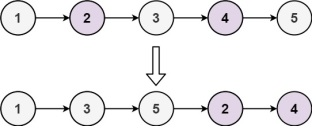

Input: head = [1,2,3,4,5]

Output: [1,3,5,2,4]

\
**Example 2:**

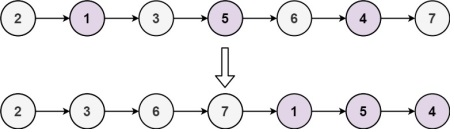

Input: head = [2,1,3,5,6,4,7]

Output: [2,3,6,7,1,5,4]

\
**Constraints:**

The number of nodes in the linked list is in the range [0, 104].

-106 <= Node.val <= 106

In [ ]:
# Definition for singly-linked list.
class ListNode:
    def __init__(self, val=0, next=None):
        self.val = val
        self.next = next

class Solution:
    def oddEvenList(self, head: ListNode) -> ListNode:
        if not head or not head.next:
            return head  # If 0 or 1 node, return as it is

        odd = head  # Head of odd-indexed nodes
        even = head.next  # Head of even-indexed nodes
        even_head = even  # Store even head to connect later

        while even and even.next:
            odd.next = even.next  # Link odd node to the next odd node
            odd = odd.next  # Move odd pointer forward

            even.next = odd.next  # Link even node to the next even node
            even = even.next  # Move even pointer forward

        odd.next = even_head  # Append even list after odd list

        return head  # Return the modified list

# Function to create a linked list from user input
def create_linked_list():
    values = list(map(int, input("Enter space-separated numbers: ").split()))
    if not values:
        return None
    head = ListNode(values[0])
    current = head
    for val in values[1:]:
        current.next = ListNode(val)
        current = current.next
    return head

# Function to print linked list
def print_linked_list(head):
    result = []
    while head:
        result.append(head.val)
        head = head.next
    print("Reordered List:", result)

# Taking user input
head = create_linked_list()
solution = Solution()
new_head = solution.oddEvenList(head)
print_linked_list(new_head)

[1, 3, 5, 2, 4]


#Question 14 - Basic Calculator

Given a string s representing a valid expression, implement a basic calculator to evaluate it, and return the result of the evaluation.

Note: You are not allowed to use any built-in function which evaluates strings as mathematical expressions, such as eval().


\
**Example 1:**

Input: s = "1 + 1"

Output: 2

\
**Example 2:**

Input: s = " 2-1 + 2 "

Output: 3

\
**Example 3:**

Input: s = "(1+(4+5+2)-3)+(6+8)"

Output: 23

\
**Constraints:**

1 <= s.length <= 3 * 105

s consists of digits, '+', '-', '(', ')', and ' '.

s represents a valid expression.

'+' is not used as a unary operation (i.e., "+1" and "+(2 + 3)" is invalid).

'-' could be used as a unary operation (i.e., "-1" and "-(2 + 3)" is valid).

There will be no two consecutive operators in the input.

Every number and running calculation will fit in a signed 32-bit integer.

In [ ]:
class Solution:
    def calculate(self, s: str) -> int:
        stack = []
        num = 0
        sign = 1  # 1 for positive, -1 for negative
        result = 0

        for char in s:
            if char.isdigit():
                num = num * 10 + int(char)
            elif char in ['+', '-']:
                result += sign * num
                num = 0
                sign = 1 if char == '+' else -1
            elif char == '(':
                stack.append(result)
                stack.append(sign)
                result = 0
                sign = 1
            elif char == ')':
                result += sign * num
                num = 0
                result *= stack.pop()
                result += stack.pop()

        return result + sign * num  # Add the last number to result

# Taking user input
s = input("Enter a valid arithmetic expression: ")
solution = Solution()
print("Result:", solution.calculate(s))